In [135]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [136]:
import pandas as pd # read CSV file
import numpy as np # linear algebra
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
# preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Algorithms
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
# scoring metrics
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

import time

In [137]:
# defining attrited values
def attritted(y_test,y_test_predict):
  misclassified=0
  count = 0

  act = 0
  for i in range(len(y_test)):
    if y_test.iloc[i] == 1:
      act += 1
      if y_test_predict[i] != 1:
        misclassified += 1
      else:
        count += 1
  print("True values for employess that left the job are",act)
  print("Among those {} were predicted accurately and {} were misclassified.".format(count,misclassified))

In [138]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/HR analytic/HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [140]:
df.shape

(1470, 35)

In [141]:
# check for missing values
data = df.replace('?',np.NaN)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 1470
Number of attributes = 35
Number of missing values:
	Age: 0
	Attrition: 0
	BusinessTravel: 0
	DailyRate: 0
	Department: 0
	DistanceFromHome: 0
	Education: 0
	EducationField: 0
	EmployeeCount: 0
	EmployeeNumber: 0
	EnvironmentSatisfaction: 0
	Gender: 0
	HourlyRate: 0
	JobInvolvement: 0
	JobLevel: 0
	JobRole: 0
	JobSatisfaction: 0
	MaritalStatus: 0
	MonthlyIncome: 0
	MonthlyRate: 0
	NumCompaniesWorked: 0
	Over18: 0
	OverTime: 0
	PercentSalaryHike: 0
	PerformanceRating: 0
	RelationshipSatisfaction: 0
	StandardHours: 0
	StockOptionLevel: 0
	TotalWorkingYears: 0
	TrainingTimesLastYear: 0
	WorkLifeBalance: 0
	YearsAtCompany: 0
	YearsInCurrentRole: 0
	YearsSinceLastPromotion: 0
	YearsWithCurrManager: 0


** Check JobRole of employee**




In [142]:
df.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [143]:
# show descriptive statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [144]:
#drop column that have constant values
df=df.drop_duplicates() #Dropping out duplicate values
df= df.drop(["Over18","EmployeeCount","EmployeeNumber","StandardHours"],axis = 1) #Dropping out irrelavant data
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [145]:
# perform descriptive analysis on categorical attributes
df.describe(include="O").T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
OverTime,1470,2,No,1054


In [146]:
 #exploratory data analysis
a = df[[ 'Attrition','BusinessTravel','Age', 'Department', 'EducationField', 'Gender','JobRole', 'MaritalStatus', 'OverTime','Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','RelationshipSatisfaction','PercentSalaryHike','WorkLifeBalance']]

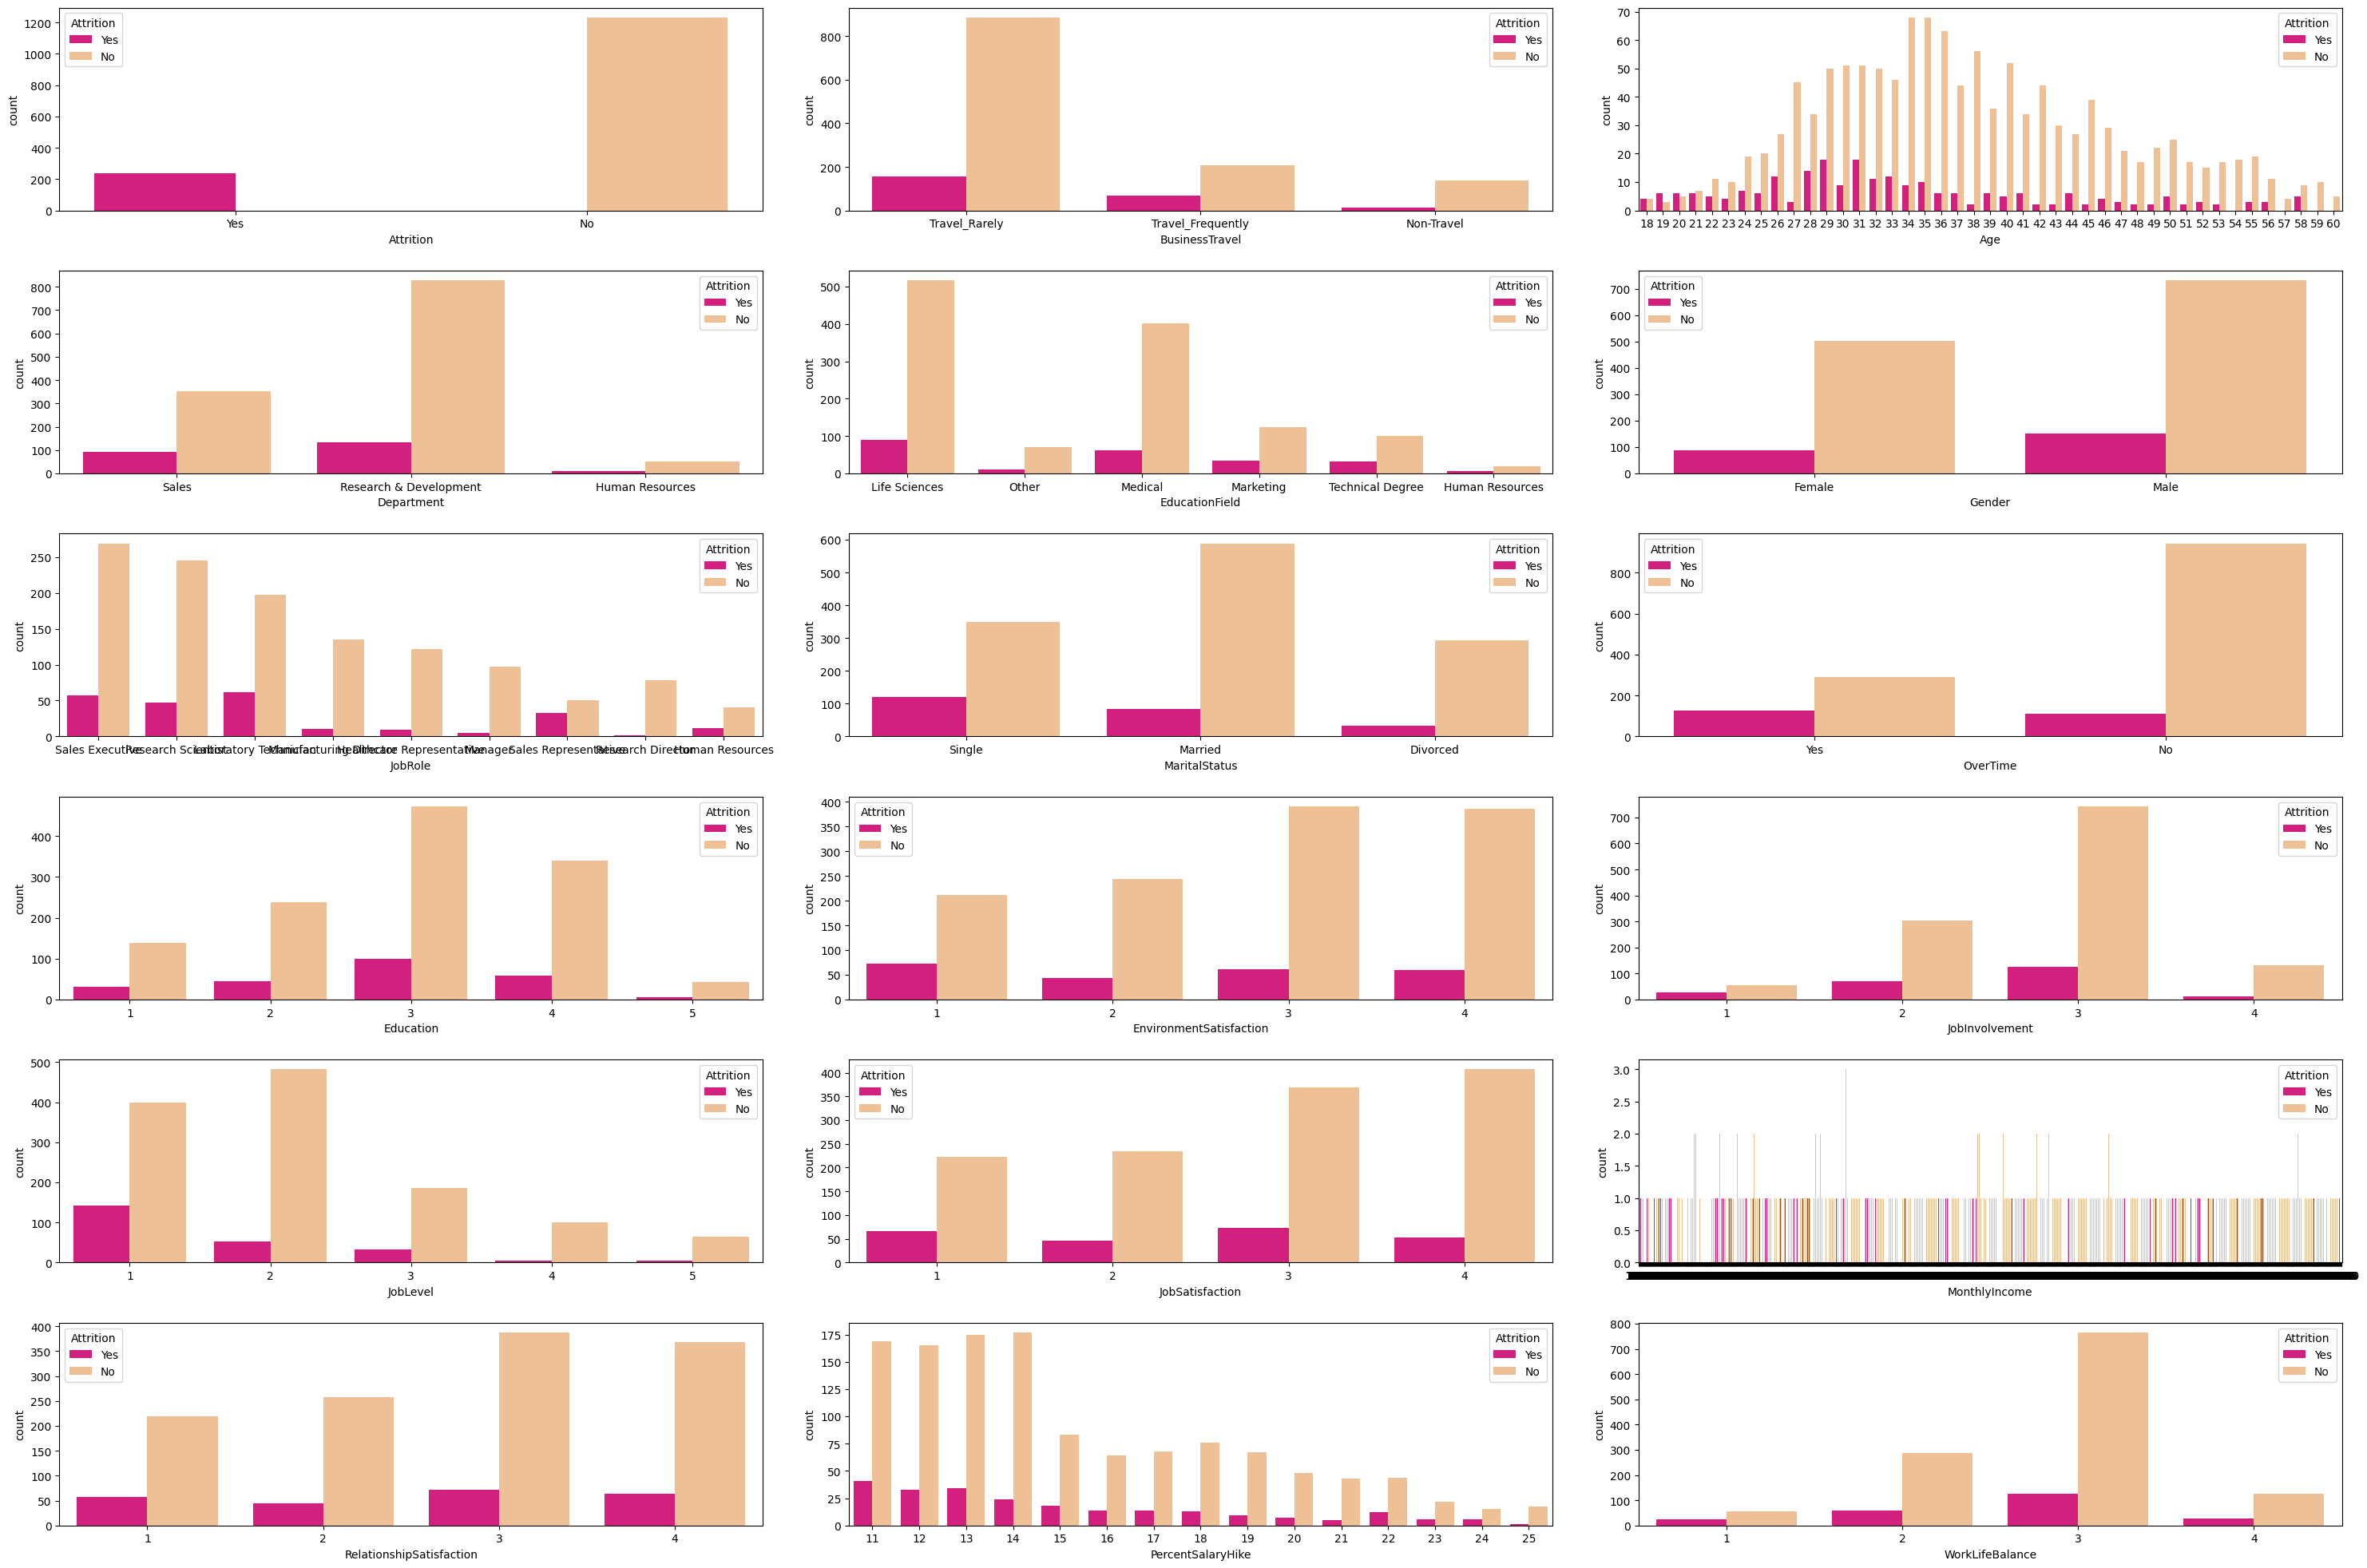

In [147]:
plt.figure(figsize=(30,20))
for index,column in enumerate(a):
    plt.subplot(6,3,index+1)
    sns.countplot(data=a,x=column, hue= df.Attrition, palette='Accent_r')
plt.tight_layout(pad = 2.0)

<ipython-input-148-b6620ecf0795>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap = 'ocean')


<Axes: >

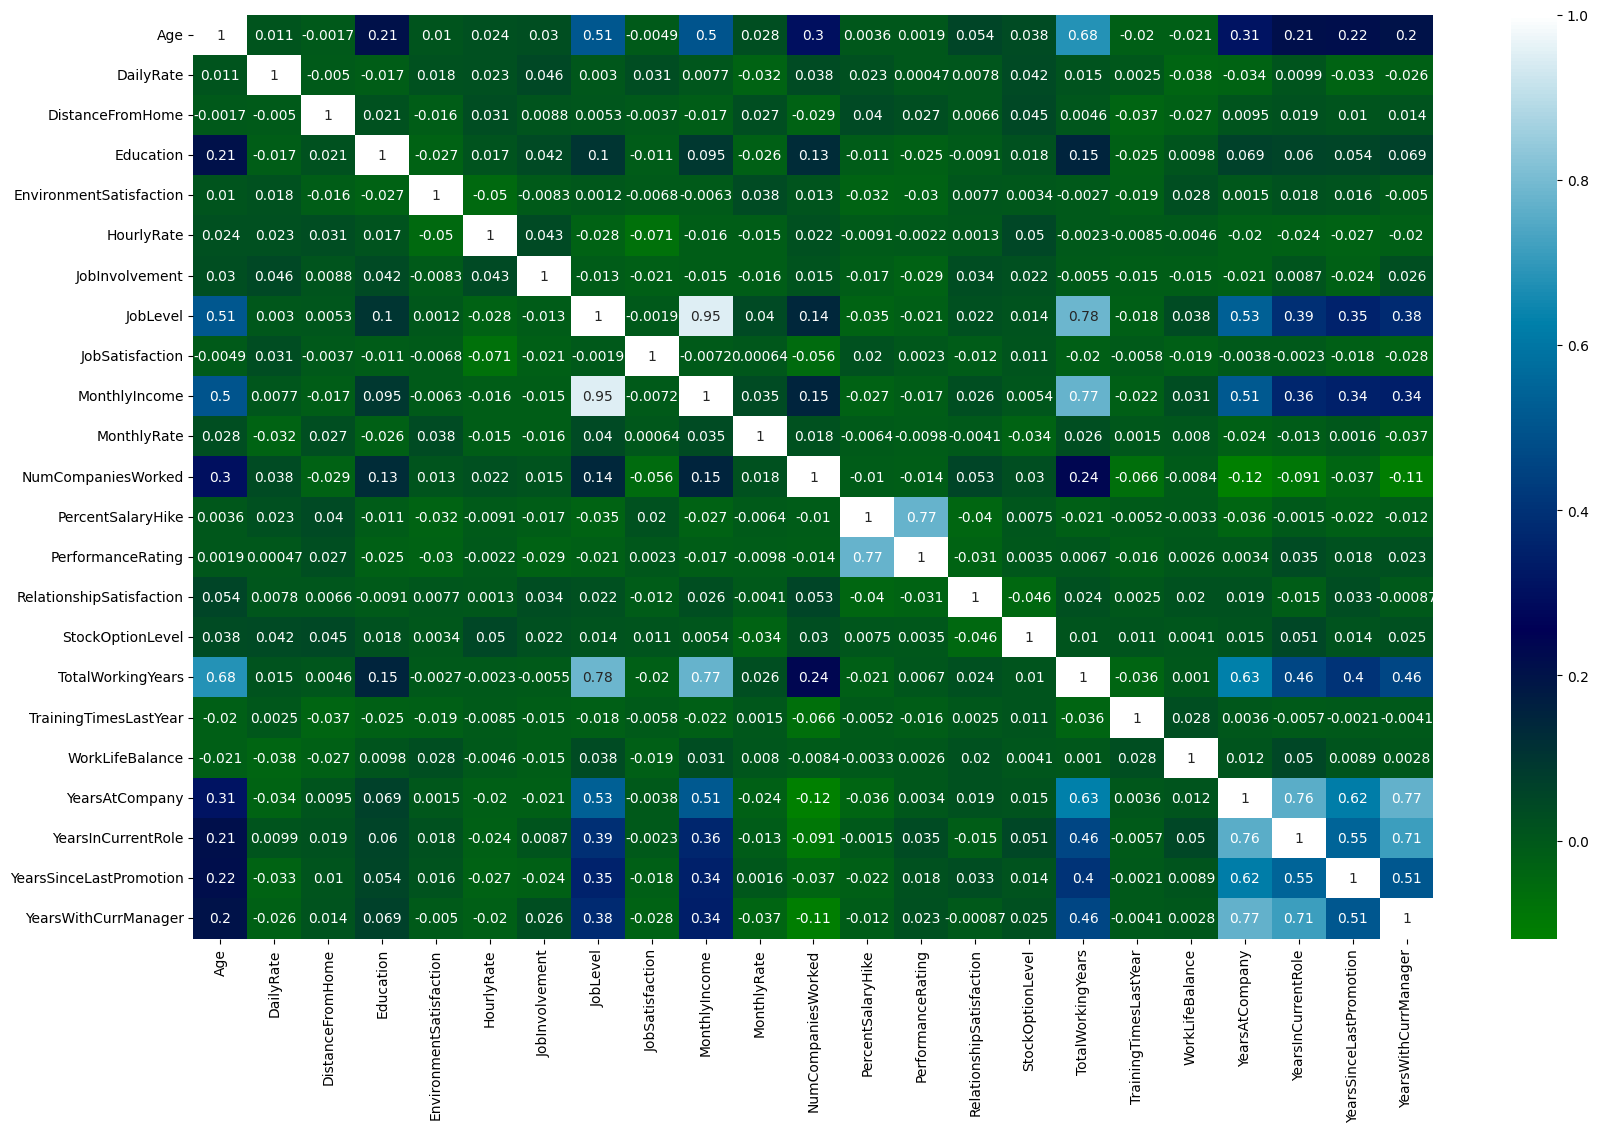

In [148]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True, cmap = 'ocean')

In [149]:
# label encoding
listCategorialColumns = df.select_dtypes(include = 'object').columns.to_list()
labelencoder = LabelEncoder()
for i in listCategorialColumns:
    df[i] = labelencoder.fit_transform(df[i])
    df.head(10)

In [150]:
X = df.drop("Attrition",axis = 1)
y =  df["Attrition"]

In [151]:
print(X.columns)
print(X.shape)

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
(1470, 30)


In [152]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [153]:
# data scalering
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled=pd.DataFrame(X_scaled)
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.446350,0.590048,0.742527,1.401512,-1.010909,-0.891688,-0.937414,-0.660531,-1.224745,1.383138,...,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-0.913194,-1.297775,-0.493817,-0.147150,-1.868426,-0.937414,0.254625,0.816497,-0.240677,...,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,0.590048,1.414363,-0.493817,-0.887515,-0.891688,1.316673,1.169781,0.816497,1.284725,...,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,-0.913194,1.461466,-0.493817,-0.764121,1.061787,-0.937414,1.169781,-1.224745,-0.486709,...,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0.590048,-0.524295,-0.493817,-0.887515,-1.868426,0.565311,-1.575686,0.816497,-1.274014,...,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227


In [154]:
# Data spliting for testing and traing
#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1)
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,random_state=None,shuffle=True)
for train_index,test_index in kf.split(X):
    print("Train",train_index,"validation:",test_index)
    X_train,X_test=X.iloc[train_index,:],X.iloc[test_index]
    y_train,y_test=y[train_index],y[test_index]

Train [   0    2    3 ... 1467 1468 1469] validation: [   1   14   19   24   27   37   43   46   48   49   50   53   58   62
   63   65   69   78   90   98  100  102  111  114  121  125  127  128
  133  137  139  143  145  152  157  170  179  184  188  195  199  203
  205  208  209  216  219  227  229  236  257  259  260  266  268  273
  274  283  284  288  290  297  299  302  308  312  315  317  322  330
  337  339  340  344  355  356  357  361  365  381  384  385  388  397
  398  402  403  408  409  410  414  416  420  422  431  432  433  436
  446  451  454  455  461  462  470  477  491  498  499  503  505  516
  530  536  538  539  544  551  552  553  557  570  577  581  586  595
  596  605  614  616  620  622  627  630  648  653  661  671  680  685
  688  689  693  695  709  717  723  724  725  727  740  752  768  772
  774  776  778  787  789  794  800  803  806  809  811  812  820  823
  829  843  847  848  852  867  879  883  884  889  890  902  904  906
  908  913  924  931  9

In [155]:
from sklearn.inspection import permutation_importance
def get_feature_importances(X,y,model,score='neg_mean_squared_error'):
    results = permutation_importance(model, X, y, scoring=score)
    return results.importances_mean


def plot_feature_importances(X,importance,title):
    # plot feature importance
    plt.barh([x for x in X.columns],importance)
    plt.xticks(range(0,len(importance)))
    plt.title(title)
    plt.show()

In [156]:
#applying rfc with optimal parameters
#applying rfc with optimal parameters
rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)


rfc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=1000, n_jobs=1,
                       oob_score=True)

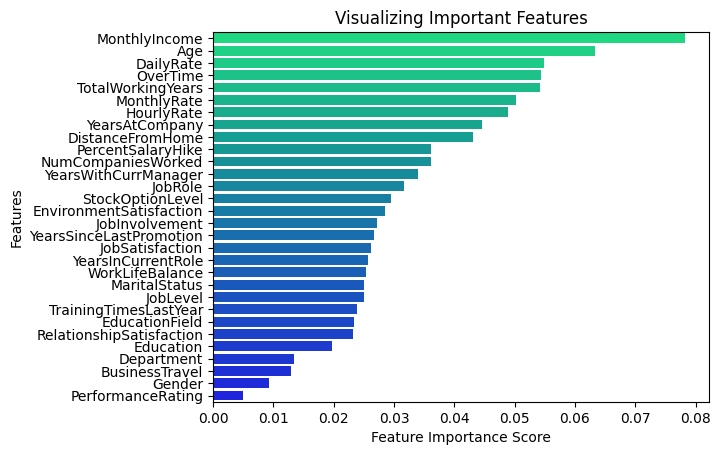

In [157]:
importances = get_feature_importances(X_train,y_train,rfc)
# Finding the variable with more importance
feature_imp = pd.Series(rfc.feature_importances_,index= X_train.columns).sort_values(ascending=False)
# Creating a bar plot
feature_imp=feature_imp[0:34,]
sns.barplot(x=feature_imp, y=feature_imp.index,palette='winter_r')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()


In [158]:
y_predict = rfc.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [159]:
cnf_matrix = confusion_matrix(y_test, y_predict)
print(cnf_matrix)
plt.figure(figsize=(12,12))
confusion = pd.DataFrame(cnf_matrix, index=['will stay ', 'will leave'],
                         columns=['predicted_to stay','predicted_ to leave'])
confusion


[[238   6]
 [ 42   8]]


,predicted_to stay,predicted_ to leave
will stay,238,6
will leave,42,8


<Figure size 1200x1200 with 0 Axes>

<Axes: >

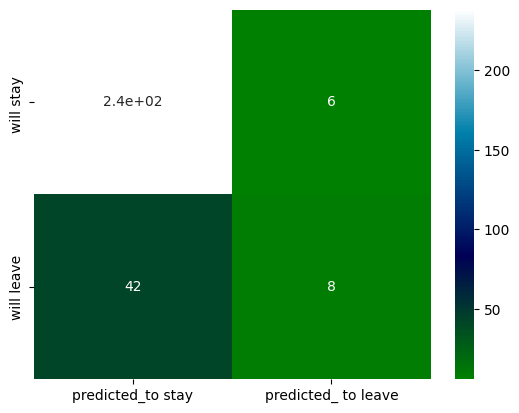

In [160]:
sns.heatmap(confusion, annot=True,cmap = 'ocean')

In [161]:
from sklearn import metrics
from sklearn.metrics import classification_report
print('accuracy %s' %metrics.accuracy_score(y_predict,y_test))
target_names = ['NO', 'YES']
print(classification_report(y_test, y_predict,target_names=target_names))

accuracy 0.8367346938775511
              precision    recall  f1-score   support

          NO       0.85      0.98      0.91       244
         YES       0.57      0.16      0.25        50

    accuracy                           0.84       294
   macro avg       0.71      0.57      0.58       294
weighted avg       0.80      0.84      0.80       294



In [162]:
attritted(y_test,y_predict)

True values for employess that left the job are 50
Among those 8 were predicted accurately and 42 were misclassified.


**XGB CLassifier**

In [163]:
xgb = XGBClassifier( seed=42,
                        objective='binary:logistic',
                        eval_metric="logloss", ## this avoids warning...
                        gamma=0.25,
                        learning_rate=0.1,
                        max_depth=5,
                        reg_lambda=10,
                        scale_pos_weight=6,
                        subsample=0.8,
                        colsample_bytree=0.5,
                        use_label_encoder=False)
xgb.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.25, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

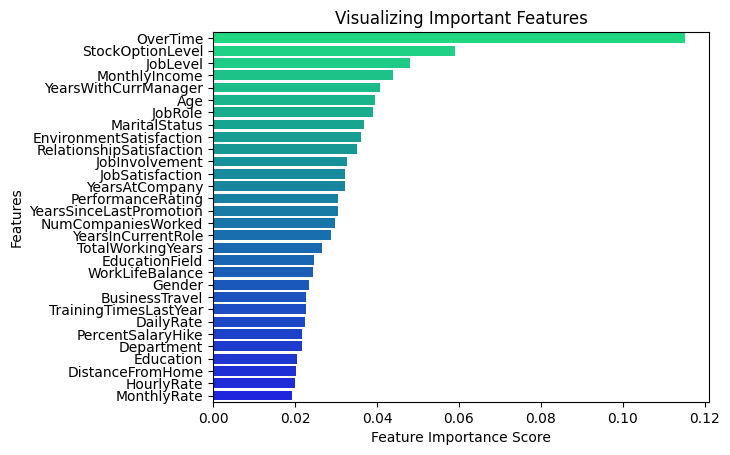

In [164]:
importances = get_feature_importances(X_train,y_train,xgb)
# Finding the variable with more importance
feature_imp = pd.Series(xgb.feature_importances_,index= X_train.columns).sort_values(ascending=False)
# Creating a bar plot
feature_imp=feature_imp[0:34,]
sns.barplot(x=feature_imp, y=feature_imp.index,palette='winter_r')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [165]:
pred = xgb.predict(X_test)

In [166]:
cm = np.array(confusion_matrix(y_test, pred, labels=[0,1]))
confusion = pd.DataFrame(cm, index=['will stay ', 'will leave'],
                         columns=['predicted_to stay','predicted_ to leave'])
confusion

,predicted_to stay,predicted_ to leave
will stay,217,27
will leave,21,29


<Axes: >

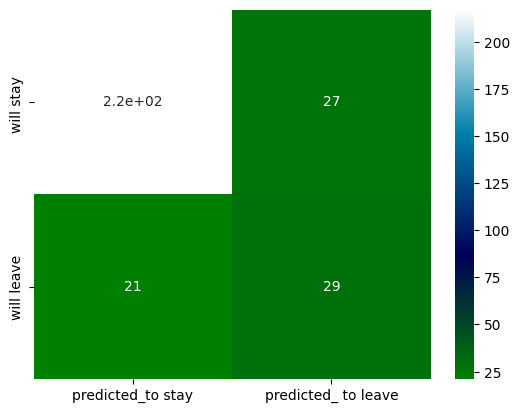

In [167]:
sns.heatmap(confusion, annot=True,cmap = 'ocean')

In [168]:
from sklearn import metrics
from sklearn.metrics import classification_report
print('accuracy %s' %metrics.accuracy_score(pred,y_test))
target_names = ['NO', 'YES']
print(classification_report(y_test,pred,target_names=target_names))

accuracy 0.8367346938775511
              precision    recall  f1-score   support

          NO       0.91      0.89      0.90       244
         YES       0.52      0.58      0.55        50

    accuracy                           0.84       294
   macro avg       0.71      0.73      0.72       294
weighted avg       0.84      0.84      0.84       294



In [169]:
attritted(y_test,pred)

True values for employess that left the job are 50
Among those 29 were predicted accurately and 21 were misclassified.


**logistic Regression**

In [170]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

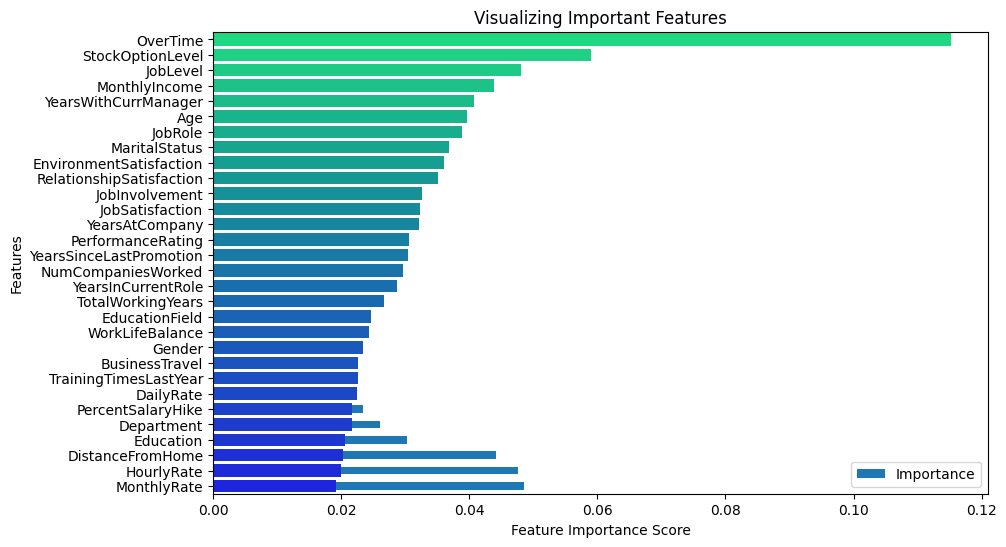

In [171]:
importances = get_feature_importances(X_train,y_train,log_reg)
# Finding the variable with more importance

coefficients = log_reg.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
#feature_imp = pd.Series(log_reg.feature_importances_,index= X_train.columns).sort_values(ascending=False)
# Creating a bar plot
feature_imp=feature_imp[0:34,]
sns.barplot(x=feature_imp, y=feature_imp.index,palette='winter_r')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [172]:
prediction_log = log_reg.predict(X_test)

In [173]:
cm = np.array(confusion_matrix(y_test, prediction_log, labels=[0,1]))
confusion = pd.DataFrame(cm, index=['will stay ', 'will leave'],
                         columns=['predicted_to stay','predicted_ to leave'])
confusion

,predicted_to stay,predicted_ to leave
will stay,244,0
will leave,50,0


<Axes: >

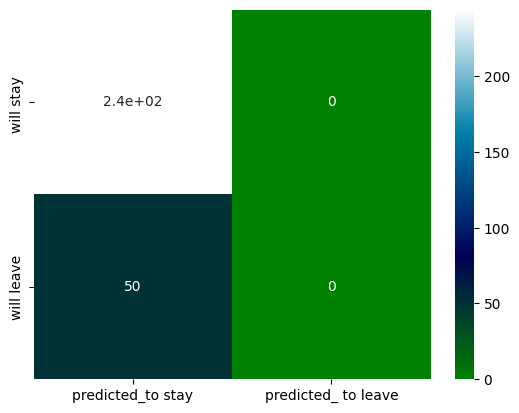

In [174]:
sns.heatmap(confusion, annot=True,cmap = 'ocean')

In [175]:
from sklearn import metrics
from sklearn.metrics import classification_report
print('accuracy %s' %metrics.accuracy_score(prediction_log,y_test))
target_names = ['NO', 'YES']
print(classification_report(y_test, prediction_log,target_names=target_names))

accuracy 0.8299319727891157
              precision    recall  f1-score   support

          NO       0.83      1.00      0.91       244
         YES       0.00      0.00      0.00        50

    accuracy                           0.83       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.69      0.83      0.75       294



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [176]:
attritted(y_test,prediction_log)

True values for employess that left the job are 50
Among those 0 were predicted accurately and 50 were misclassified.
